In [1]:
# import packages
import pandas as pd 
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

import plotly.express as px

import plotly.express as px
import seaborn as sns 
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport

In [2]:
# importing dataset

data = pd.read_csv('Traffic_Crashes_-_Crashes.csv') 
display(data.shape)
data.info()

(539468, 49)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539468 entries, 0 to 539467
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                539468 non-null  object 
 1   RD_NO                          534919 non-null  object 
 2   CRASH_DATE_EST_I               40905 non-null   object 
 3   CRASH_DATE                     539468 non-null  object 
 4   POSTED_SPEED_LIMIT             539468 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         539468 non-null  object 
 6   DEVICE_CONDITION               539468 non-null  object 
 7   WEATHER_CONDITION              539468 non-null  object 
 8   LIGHTING_CONDITION             539468 non-null  object 
 9   FIRST_CRASH_TYPE               539468 non-null  object 
 10  TRAFFICWAY_TYPE                539468 non-null  object 
 11  LANE_CNT                       198968 non-null  float64
 12  ALIGNMENT                     

In [3]:
# selecting/showing numeric columns

df_numeric = data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# selecting/showing non numeric columns

df_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['POSTED_SPEED_LIMIT' 'LANE_CNT' 'STREET_NO' 'BEAT_OF_OCCURRENCE'
 'NUM_UNITS' 'INJURIES_TOTAL' 'INJURIES_FATAL' 'INJURIES_INCAPACITATING'
 'INJURIES_NON_INCAPACITATING' 'INJURIES_REPORTED_NOT_EVIDENT'
 'INJURIES_NO_INDICATION' 'INJURIES_UNKNOWN' 'CRASH_HOUR'
 'CRASH_DAY_OF_WEEK' 'CRASH_MONTH' 'LATITUDE' 'LONGITUDE']
['CRASH_RECORD_ID' 'RD_NO' 'CRASH_DATE_EST_I' 'CRASH_DATE'
 'TRAFFIC_CONTROL_DEVICE' 'DEVICE_CONDITION' 'WEATHER_CONDITION'
 'LIGHTING_CONDITION' 'FIRST_CRASH_TYPE' 'TRAFFICWAY_TYPE' 'ALIGNMENT'
 'ROADWAY_SURFACE_COND' 'ROAD_DEFECT' 'REPORT_TYPE' 'CRASH_TYPE'
 'INTERSECTION_RELATED_I' 'NOT_RIGHT_OF_WAY_I' 'HIT_AND_RUN_I' 'DAMAGE'
 'DATE_POLICE_NOTIFIED' 'PRIM_CONTRIBUTORY_CAUSE' 'SEC_CONTRIBUTORY_CAUSE'
 'STREET_DIRECTION' 'STREET_NAME' 'PHOTOS_TAKEN_I' 'STATEMENTS_TAKEN_I'
 'DOORING_I' 'WORK_ZONE_I' 'WORK_ZONE_TYPE' 'WORKERS_PRESENT_I'
 'MOST_SEVERE_INJURY' 'LOCATION']


In [4]:
# Overview of descriptive statistics 

data.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,539468.000000,1.989680e+05,539468.000000,539463.000000,539466.000000,538365.000000,538365.000000,538365.000000,538365.000000,538365.000000,538365.000000,538365.0,539468.000000,539468.000000,539468.000000,536366.000000,536366.000000
mean,28.311657,1.333232e+01,3664.200559,1238.295151,2.033969,0.180645,0.001096,0.019726,0.100971,0.058852,2.019191,0.0,13.249394,4.125620,6.613997,41.854833,-87.673022
std,6.417193,2.961906e+03,2909.733627,706.882710,0.447349,0.552809,0.035887,0.164411,0.410392,0.311681,1.168503,0.0,5.519311,1.979328,3.375880,0.334513,0.679754
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.935877
25%,30.000000,2.000000e+00,1216.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781578,-87.721215
50%,30.000000,2.000000e+00,3199.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.875131,-87.673374
75%,30.000000,4.000000e+00,5599.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.923985,-87.632795
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [5]:
# Percentage of Data Missing Per Column Above 59%

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > .59][:152]

,Total,Missing Percent
WORKERS_PRESENT_I,538629,99.844476
DOORING_I,537731,99.678016
WORK_ZONE_TYPE,536783,99.502287
WORK_ZONE_I,536069,99.369935
PHOTOS_TAKEN_I,532737,98.752289
STATEMENTS_TAKEN_I,528495,97.965959
NOT_RIGHT_OF_WAY_I,513956,95.270897
CRASH_DATE_EST_I,498563,92.417530
INTERSECTION_RELATED_I,417146,77.325439
HIT_AND_RUN_I,377075,69.897566


In [6]:
# Deleting columns with more than 60% of missing data 

limitPer = len(data) * .60
data = data.dropna(thresh = limitPer, axis = 1)

In [7]:
# Percentage of missing data above .01%

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > .01][:152]

,Total,Missing Percent
REPORT_TYPE,13472,2.497275
RD_NO,4549,0.843238
LATITUDE,3102,0.575011
LOCATION,3102,0.575011
LONGITUDE,3102,0.575011
MOST_SEVERE_INJURY,1114,0.206500
INJURIES_UNKNOWN,1103,0.204461
INJURIES_NO_INDICATION,1103,0.204461
INJURIES_REPORTED_NOT_EVIDENT,1103,0.204461
INJURIES_INCAPACITATING,1103,0.204461


In [8]:
# Dropping Rows with Missing Data

data = data.dropna()

In [9]:
# Reviewing the data shape, columns and stats 

display(data.shape)
display(data.info())
data.describe()

(517457, 38)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517457 entries, 0 to 539467
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                517457 non-null  object 
 1   RD_NO                          517457 non-null  object 
 2   CRASH_DATE                     517457 non-null  object 
 3   POSTED_SPEED_LIMIT             517457 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         517457 non-null  object 
 5   DEVICE_CONDITION               517457 non-null  object 
 6   WEATHER_CONDITION              517457 non-null  object 
 7   LIGHTING_CONDITION             517457 non-null  object 
 8   FIRST_CRASH_TYPE               517457 non-null  object 
 9   TRAFFICWAY_TYPE                517457 non-null  object 
 10  ALIGNMENT                      517457 non-null  object 
 11  ROADWAY_SURFACE_COND           517457 non-null  object 
 12  ROAD_DEFECT                   

None

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,517457.000000,517457.000000,517457.000000,517457.000000,517457.000000,517457.000000,517457.000000,517457.000000,517457.000000,517457.000000,517457.0,517457.000000,517457.000000,517457.000000,517457.000000,517457.000000
mean,28.309396,3665.462307,1238.865989,2.030766,0.175483,0.000870,0.018941,0.098002,0.057670,2.017685,0.0,13.255921,4.128339,6.603007,41.855005,-87.673142
std,6.405533,2840.156882,707.147474,0.437111,0.542108,0.031627,0.160136,0.403160,0.307369,1.165818,0.0,5.504394,1.977575,3.385810,0.330073,0.670158
min,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.935877
25%,30.000000,1224.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781768,-87.721133
50%,30.000000,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.875190,-87.673303
75%,30.000000,5598.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924032,-87.632794
max,99.000000,13799.000000,2535.000000,18.000000,21.000000,3.000000,6.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [10]:
# Reviewing the top 10 value counts in each column

for col in data.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(data[col].value_counts().head(10))

----------------------------------------CRASH_RECORD_ID---------------------------------------- - 

4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62ded0cf5fa7597f0f07367c789a2afe141853d52bdc085ec5a25f303b9f02dbd8bb1c26a5704b7925d06    1
a65aaee77df47ddb6c9f4c674efc5ba62136e9c8804d6516eaa5cfafaf63e5443ff5f01c11c35d2cb57f3d940f3f56a19a0202a74aedf62562b0423005c823ed    1
a65c4c456b87ced3628ccc11cd5f70218e79640b358011012329bde6e60412f971ecf2f706f6377b95f0ac420375aafa7661102893434b0591913fac3cc62c80    1
a65c0d4e3bbccd4ab87b93b82f4b1de963243c4839bc4f37bc0b4ba80eb390b8430648726f1e55bb11802586e175a28855326da65a2e2578399d6cca07893490    1
a65bfdabbb6396a5ab1f6c979609c4ecffa45e22ccbaede9590f1cd7b20da05e368db42683e9462e0db468da1fb986ef2e8becb507fe85e6d422715b17ae6a8b    1
a65bcc9944efb7724dc0dee84ba017b575e3bddcd7cf0a8f84a5228d709b461ba1b3f1d529e46e50cc008cb71b60a3ec8bd055202987e7942c4b34d780b4b7b5    1
a65ba038259f60eaa6b1bd5cb8a1940e1b15071695354be973795ebdc0ec4d77903323b32f4c0d0c1f686171fbd024053e1b92cee466a68695baa0da29c20db1    1
a65b9ea92a4815f2b18fdd33e72f98c1ccdae8a95bb2f8a98ee8c8f1c2467f

----------------------------------------RD_NO---------------------------------------- - 

JC343143    1
JD143018    1
HZ240929    1
JD103594    1
JE248450    1
JB158494    1
JC273201    1
JB131822    1
HZ336044    1
JB275629    1
Name: RD_NO, dtype: int64

----------------------------------------CRASH_DATE---------------------------------------- - 

12/29/2020 05:00:00 PM    29
11/10/2017 10:30:00 AM    26
11/10/2017 10:00:00 AM    20
01/12/2019 02:30:00 PM    18
01/12/2019 03:00:00 PM    18
01/12/2019 02:00:00 PM    17
02/04/2021 01:30:00 PM    17
02/04/2021 02:00:00 PM    17
09/04/2018 08:00:00 AM    16
02/26/2020 08:00:00 AM    16
Name: CRASH_DATE, dtype: int64

----------------------------------------POSTED_SPEED_LIMIT---------------------------------------- - 

30    381207
35     35386
25     31670
20     20356
15     18256
10     11281
0       6730
40      4810
5       3717
45      3005
Name: POSTED_SPEED_LIMIT, dtype: int64

----------------------------------------TRAFFIC_CONTROL_DEVICE---------------------------------------- - 

NO CONTROLS               298561
TRAFFIC SIGNAL            143528
STOP SIGN/FLASHER          51212
UNKNOWN                    16802
OTHER                       3076
LANE USE MARKING            1143
YIELD                        710
OTHER REG. SIGN              520
OTHER WARNING SIGN           453
RAILROAD CROSSING GATE       332
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

----------------------------------------DEVICE_CONDITION---------------------------------------- - 

NO CONTROLS                 301677
FUNCTIONING PROPERLY        178657
UNKNOWN                      28532
OTHER                         3965
FUNCTIONING IMPROPERLY        2648
NOT FUNCTIONING               1699
WORN REFLECTIVE MATERIAL       218
MISSING                         61
Name: DEVICE_CONDITION, dtype: int64

----------------------------------------WEATHER_CONDITION---------------------------------------- - 

CLEAR                    411174
RAIN                      44564
UNKNOWN                   22928
SNOW                      19637
CLOUDY/OVERCAST           15214
OTHER                      1587
FOG/SMOKE/HAZE              813
SLEET/HAIL                  696
FREEZING RAIN/DRIZZLE       594
BLOWING SNOW                157
Name: WEATHER_CONDITION, dtype: int64

----------------------------------------LIGHTING_CONDITION---------------------------------------- - 

DAYLIGHT                  337878
DARKNESS, LIGHTED ROAD    110414
DARKNESS                   25443
UNKNOWN                    19323
DUSK                       15601
DAWN                        8798
Name: LIGHTING_CONDITION, dtype: int64

----------------------------------------FIRST_CRASH_TYPE---------------------------------------- - 

REAR END                        122369
PARKED MOTOR VEHICLE            120802
SIDESWIPE SAME DIRECTION         79001
TURNING                          71928
ANGLE                            54752
FIXED OBJECT                     23927
PEDESTRIAN                       11665
PEDALCYCLIST                      7597
SIDESWIPE OPPOSITE DIRECTION      7585
OTHER OBJECT                      4885
Name: FIRST_CRASH_TYPE, dtype: int64

----------------------------------------TRAFFICWAY_TYPE---------------------------------------- - 

NOT DIVIDED                        230069
DIVIDED - W/MEDIAN (NOT RAISED)     90218
ONE-WAY                             68191
PARKING LOT                         36545
DIVIDED - W/MEDIAN BARRIER          30458
FOUR WAY                            19012
OTHER                               14365
ALLEY                                8587
UNKNOWN                              5653
CENTER TURN LANE                     4275
Name: TRAFFICWAY_TYPE, dtype: int64

----------------------------------------ALIGNMENT---------------------------------------- - 

STRAIGHT AND LEVEL       504675
STRAIGHT ON GRADE          6451
CURVE, LEVEL               3828
STRAIGHT ON HILLCREST      1543
CURVE ON GRADE              721
CURVE ON HILLCREST          239
Name: ALIGNMENT, dtype: int64

----------------------------------------ROADWAY_SURFACE_COND---------------------------------------- - 

DRY                388690
WET                 68751
UNKNOWN             34980
SNOW OR SLUSH       19779
ICE                  3811
OTHER                1223
SAND, MUD, DIRT       223
Name: ROADWAY_SURFACE_COND, dtype: int64

----------------------------------------ROAD_DEFECT---------------------------------------- - 

NO DEFECTS           428693
UNKNOWN               77549
RUT, HOLES             4611
OTHER                  2931
WORN SURFACE           2134
SHOULDER DEFECT        1104
DEBRIS ON ROADWAY       435
Name: ROAD_DEFECT, dtype: int64

----------------------------------------REPORT_TYPE---------------------------------------- - 

NOT ON SCENE (DESK REPORT)    300791
ON SCENE                      216429
AMENDED                          237
Name: REPORT_TYPE, dtype: int64

----------------------------------------CRASH_TYPE---------------------------------------- - 

NO INJURY / DRIVE AWAY              388384
INJURY AND / OR TOW DUE TO CRASH    129073
Name: CRASH_TYPE, dtype: int64

----------------------------------------DAMAGE---------------------------------------- - 

OVER $1,500      302512
$501 - $1,500    149624
$500 OR LESS      65321
Name: DAMAGE, dtype: int64

----------------------------------------DATE_POLICE_NOTIFIED---------------------------------------- - 

02/26/2020 08:30:00 AM    12
10/12/2020 04:00:00 PM    11
06/30/2018 09:30:00 PM    11
02/14/2020 05:00:00 PM    11
07/01/2021 07:00:00 PM    11
02/19/2021 04:00:00 PM    11
01/12/2019 04:30:00 PM    11
02/05/2020 05:00:00 PM    10
09/13/2019 05:00:00 PM    10
05/31/2019 04:00:00 PM    10
Name: DATE_POLICE_NOTIFIED, dtype: int64

----------------------------------------PRIM_CONTRIBUTORY_CAUSE---------------------------------------- - 

UNABLE TO DETERMINE                       193519
FAILING TO YIELD RIGHT-OF-WAY              56344
FOLLOWING TOO CLOSELY                      54237
NOT APPLICABLE                             27682
IMPROPER OVERTAKING/PASSING                24627
IMPROPER BACKING                           22430
FAILING TO REDUCE SPEED TO AVOID CRASH     22385
IMPROPER LANE USAGE                        19658
IMPROPER TURNING/NO SIGNAL                 17111
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE        16445
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

----------------------------------------SEC_CONTRIBUTORY_CAUSE---------------------------------------- - 

NOT APPLICABLE                            210456
UNABLE TO DETERMINE                       185629
FAILING TO REDUCE SPEED TO AVOID CRASH     21061
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE        16009
FAILING TO YIELD RIGHT-OF-WAY              15493
FOLLOWING TOO CLOSELY                      14077
IMPROPER OVERTAKING/PASSING                 7637
IMPROPER LANE USAGE                         7390
WEATHER                                     6269
IMPROPER TURNING/NO SIGNAL                  5068
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

----------------------------------------STREET_NO---------------------------------------- - 

100     3346
1600    3309
800     3085
200     3042
300     2799
6300    2609
500     2589
4700    2589
2400    2495
1200    2490
Name: STREET_NO, dtype: int64

----------------------------------------STREET_DIRECTION---------------------------------------- - 

W    183927
S    173090
N    124135
E     36305
Name: STREET_DIRECTION, dtype: int64

----------------------------------------STREET_NAME---------------------------------------- - 

WESTERN AVE     14304
PULASKI RD      12325
CICERO AVE      11392
ASHLAND AVE     11319
HALSTED ST      10063
KEDZIE AVE       8737
MICHIGAN AVE     6822
STATE ST         6168
NORTH AVE        6021
CLARK ST         5734
Name: STREET_NAME, dtype: int64

----------------------------------------BEAT_OF_OCCURRENCE---------------------------------------- - 

1834.0    6619
114.0     5438
122.0     5123
1831.0    5109
813.0     5010
815.0     4833
833.0     4187
834.0     3937
2413.0    3878
1232.0    3769
Name: BEAT_OF_OCCURRENCE, dtype: int64

----------------------------------------NUM_UNITS---------------------------------------- - 

2.0     455336
1.0      27858
3.0      27397
4.0       5148
5.0       1169
6.0        344
7.0        114
8.0         51
9.0         22
10.0         7
Name: NUM_UNITS, dtype: int64

----------------------------------------MOST_SEVERE_INJURY---------------------------------------- - 

NO INDICATION OF INJURY     451009
NONINCAPACITATING INJURY     37104
REPORTED, NOT EVIDENT        20547
INCAPACITATING INJURY         8376
FATAL                          421
Name: MOST_SEVERE_INJURY, dtype: int64

----------------------------------------INJURIES_TOTAL---------------------------------------- - 

0.0    451009
1.0     50420
2.0     10864
3.0      3276
4.0      1177
5.0       434
6.0       160
7.0        61
8.0        21
9.0        14
Name: INJURIES_TOTAL, dtype: int64

----------------------------------------INJURIES_FATAL---------------------------------------- - 

0.0    517036
1.0       397
2.0        19
3.0         5
Name: INJURIES_FATAL, dtype: int64

----------------------------------------INJURIES_INCAPACITATING---------------------------------------- - 

0.0    509016
1.0      7433
2.0       750
3.0       182
4.0        61
5.0        12
6.0         3
Name: INJURIES_INCAPACITATING, dtype: int64

----------------------------------------INJURIES_NON_INCAPACITATING---------------------------------------- - 

0.0     478867
1.0      30525
2.0       5524
3.0       1639
4.0        571
5.0        201
6.0         76
7.0         30
8.0          7
10.0         4
Name: INJURIES_NON_INCAPACITATING, dtype: int64

----------------------------------------INJURIES_REPORTED_NOT_EVIDENT---------------------------------------- - 

0.0    494660
1.0     17839
2.0      3596
3.0       915
4.0       281
5.0       115
6.0        23
7.0        13
8.0         6
9.0         5
Name: INJURIES_REPORTED_NOT_EVIDENT, dtype: int64

----------------------------------------INJURIES_NO_INDICATION---------------------------------------- - 

2.0    240918
1.0    157334
3.0     66129
4.0     25084
5.0     10508
0.0      9842
6.0      4443
7.0      1687
8.0       755
9.0       319
Name: INJURIES_NO_INDICATION, dtype: int64

----------------------------------------INJURIES_UNKNOWN---------------------------------------- - 

0.0    517457
Name: INJURIES_UNKNOWN, dtype: int64

----------------------------------------CRASH_HOUR---------------------------------------- - 

16    39737
15    39456
17    39012
14    35217
18    32301
13    32211
12    30874
8     26863
11    26727
9     23999
Name: CRASH_HOUR, dtype: int64

----------------------------------------CRASH_DAY_OF_WEEK---------------------------------------- - 

6    83965
7    77055
5    74075
3    74067
4    73500
2    71692
1    63103
Name: CRASH_DAY_OF_WEEK, dtype: int64

----------------------------------------CRASH_MONTH---------------------------------------- - 

7     48435
8     47308
6     46740
5     45085
10    45050
12    42844
9     41969
11    41615
1     40082
2     40077
Name: CRASH_MONTH, dtype: int64

----------------------------------------LATITUDE---------------------------------------- - 

41.976201    702
41.751461    369
41.791420    359
41.722257    292
41.900959    268
41.754660    239
41.789329    216
41.901003    207
41.736209    187
41.742578    180
Name: LATITUDE, dtype: int64

----------------------------------------LONGITUDE---------------------------------------- - 

-87.905309    702
-87.585972    369
-87.580148    359
-87.585276    292
-87.619928    268
-87.741385    239
-87.741646    216
-87.619780    207
-87.624306    187
-87.633937    180
Name: LONGITUDE, dtype: int64

----------------------------------------LOCATION---------------------------------------- - 

POINT (-87.905309125103 41.976201139024)    702
POINT (-87.585971992965 41.751460603167)    369
POINT (-87.580147768689 41.791420282098)    359
POINT (-87.585275565077 41.722257273006)    292
POINT (-87.619928173678 41.900958919109)    268
POINT (-87.741384758605 41.754660124394)    239
POINT (-87.741645644196 41.789329323265)    216
POINT (-87.619779806193 41.901002863094)    207
POINT (-87.624305519124 41.736209469449)    187
POINT (-87.633936930688 41.742577617335)    180
Name: LOCATION, dtype: int64

In [11]:
# We can create a list of features with a high percentage of the same value.
# Specifying below to show features with over 50% rows being the same value.

num_rows = len(data.index)
low_information_cols = [] #

for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.50:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

POSTED_SPEED_LIMIT: 73.66931%
30    381207
35     35386
25     31670
20     20356
15     18256
10     11281
0       6730
40      4810
5       3717
45      3005
55       405
3        125
50       105
9         90
99        66
39        57
1         34
60        25
24        23
2         20
32        14
34        12
65        10
33        10
6          7
11         6
36         5
70         3
14         3
18         2
31         2
38         2
7          2
26         2
12         2
22         2
49         1
23         1
63         1
4          1
29         1
Name: POSTED_SPEED_LIMIT, dtype: int64

TRAFFIC_CONTROL_DEVICE: 57.69774%
NO CONTROLS                 298561
TRAFFIC SIGNAL              143528
STOP SIGN/FLASHER            51212
UNKNOWN                      16802
OTHER                         3076
LANE USE MARKING              1143
YIELD                          710
OTHER REG. SIGN                520
OTHER WARNING SIGN             453
RAILROAD CROSSING GATE         332
PEDESTRIAN CR

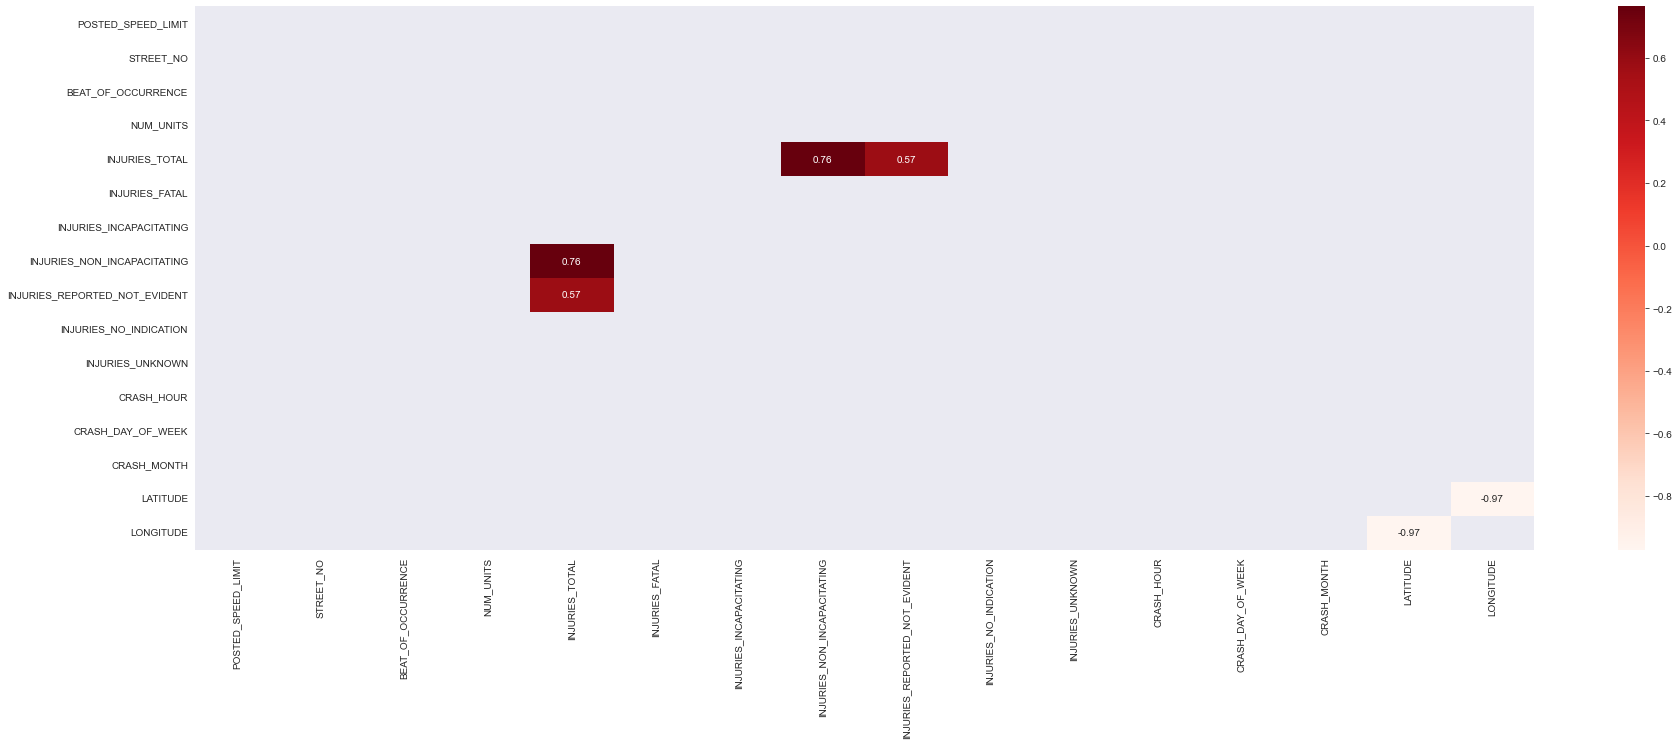

In [12]:
# Creating Correlation Heat Map

corr = data.corr() 
c1 = corr.abs().unstack().drop_duplicates()

filtered_corr = corr[((corr >= .5) | (corr <= -.5)) & (corr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filtered_corr, annot = True, cmap = "Reds")
plt.show()

In [13]:
# Reviewing the Target Variable Value Count

data['CRASH_TYPE'].value_counts(normalize = True)

NO INJURY / DRIVE AWAY              0.750563
INJURY AND / OR TOW DUE TO CRASH    0.249437
Name: CRASH_TYPE, dtype: float64

In [14]:
# Dropping Conflicting and Unnecessary Columns

data = data.drop(['CRASH_RECORD_ID', 
                  'RD_NO',
                  'CRASH_DATE', 
                  'LATITUDE', 
                  'LONGITUDE',
                  'MOST_SEVERE_INJURY',
                  'INJURIES_TOTAL',
                  'INJURIES_FATAL',
                  'INJURIES_INCAPACITATING',
                  'INJURIES_NON_INCAPACITATING',
                  'INJURIES_REPORTED_NOT_EVIDENT',
                  'INJURIES_NO_INDICATION',
                  'INJURIES_UNKNOWN',
                  'DATE_POLICE_NOTIFIED'], axis=1)

In [15]:
# Reviewing Remaining Columns

data.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION'],
      dtype='object')

In [16]:
# Creating Pandas Profile for Exploration 

profile = ProfileReport(data, title = "pandas_profiling", explorative = True)


In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("clean_traffic_crashes_data_pandas_profiling.html")

In [ ]:
# Exporting Clean Dataset to CSV

# data.to_csv ('Final_Chicago_Traffic_Crashes_Cleaned.csv', index = False, header = True)